## General Description

Analyse and plot the results from numerical model experiments of uniaxial test to measure the plastic strain ration (r-value) using various formulations including that used by ISO and ASTM.

The formulations in the existing and proposed ISO standard have been called into question.  To better understand the problem a full derivation of the formulas and their simplifications was made.  These formulations were used to create a numerical data set and then processed with a host of formula simplifcations (described here as Methods A1-K) to see the resulting errors in the measured r-values as compared to the applied r-values.

The data was created using a Matlab scripts.  It is based on selected properties for ten materials including an assumed typical r-value.  The numrically generated r-values are based on the assumed values, but with one of six functional variations (i.e. constant, piece-wise constant, linear variation increasing, piece-wise linear variation increasing, piece-wise linear variation decreasing, quadratic variation increasing).  The r-value assessment is made over a range of strain (i.e., full or one of the four (4) quarters of the plastic strain range) or at the end of the strain range for single point methods.  For each of these a reference value is created from the applied r-values to see the effect of the analysis formulations.  Note that the ASTM standard states that the single point method is the referee result (i.e. the correct result if being compared to other methods).

Three files are used as input the model results (R_dataframe.csv), the column header file of those results (R_headerfile.csv), and the units associated with the header file (R_headerunitfile.csv).  The last two files were created over one cycle of the model one for one with the model results.  This was used to check the csv was written with the correct structure (missing data would throw off the column order).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from IPython.display import display
# Note: some of these may no longer be used

In [2]:
# load in the column names from the header file
header_full=pd.read_csv('../data/R_headerfile.csv')
# check that all the entries in each column match
for n in range(0,header_full.iloc[0,:].size+1):
    if (header_full.iloc[:,2].unique().size!=1):
        print('Header column '+header_full.iloc[0,n]+' is not consistent!')
    elif n==header_full.iloc[0,:].size:
        print('Header columns match.')

# load in the column units from the header unit file
headerunit_full=pd.read_csv('../data/R_headerunitfile.csv')
# check that all the entries in each column match
for n in range(0,headerunit_full.iloc[0,:].size+1):
    if (headerunit_full.iloc[:,2].unique().size!=1):
        print('Header units column '+headerunit_full.iloc[0,n]+' is not consistent!')
    elif n==header_full.iloc[0,:].size:
        print('Header units columns match.')

Header columns match.
Header units columns match.


In [3]:
# associate units to each column and replace blank spaces with underscore in data
dataframe_unit_full=pd.read_csv('../data/R_headerunitfile.csv',nrows=1,
                          names=header_full.iloc[1,:].str.strip())

# load in data frame with column names added from the header file
dataframe_full=pd.read_csv('../data/R_dataframe.csv',
                          names=header_full.iloc[1,:].str.strip())
dataframe_full['MatID']=dataframe_full['MatID'].str.replace(' ','_')
dataframe_full['Method']=dataframe_full['Method'].str.strip()
dataframe_full['Range']=dataframe_full['Range'].str.strip()
display(dataframe_full)

,MatID,E,nu,K,epsilon_o,n_value,s_x_yield,r_value,r_function,to,...,Range,r_applied_avg_ref,r_ISO_intercept_zero_ref,r_ISO_intercept_zero_data,r_ISO_intercept_notzero_ref,r_ISO_intercept_notzero_data,r_applied_point_ref,r_single_point_ref,r_single_point_data,n_value_data
0,Material_1,70000.0,0.33,200.0,0.0083,0.20,79.863437,0.56,1,1.0,...,R_full,0.560000,0.560000,0.560002,0.560000,0.560001,0.560000,0.560000,0.560001,0.158476
1,Material_1,70000.0,0.33,200.0,0.0083,0.20,79.863437,0.56,1,1.0,...,R_1,0.560000,0.560000,0.560005,0.560000,0.560001,0.560000,0.560000,0.560003,0.124138
2,Material_1,70000.0,0.33,200.0,0.0083,0.20,79.863437,0.56,1,1.0,...,R_2,0.560000,0.560000,0.560002,0.560000,0.560001,0.560000,0.560000,0.560002,0.178883
3,Material_1,70000.0,0.33,200.0,0.0083,0.20,79.863437,0.56,1,1.0,...,R_3,0.560000,0.560000,0.560002,0.560000,0.560000,0.560000,0.560000,0.560001,0.187122
4,Material_1,70000.0,0.33,200.0,0.0083,0.20,79.863437,0.56,1,1.0,...,R_4,0.560000,0.560000,0.560001,0.560000,0.560000,0.560000,0.560000,0.560001,0.190745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,Material_10,200000.0,0.30,1300.0,0.0005,0.14,559.369019,0.80,6,1.0,...,R_full,0.800000,0.918981,0.886635,1.051899,1.041582,1.000321,1.000321,0.973265,0.155314
3896,Material_10,200000.0,0.30,1300.0,0.0005,0.14,559.369019,0.80,6,1.0,...,R_1,0.566745,0.646868,0.609915,0.763336,0.750330,0.707334,0.707334,0.674196,0.169371
3897,Material_10,200000.0,0.30,1300.0,0.0005,0.14,559.369019,0.80,6,1.0,...,R_2,0.780194,0.793086,0.760028,1.009741,1.000552,0.841166,0.841166,0.809892,0.149017
3898,Material_10,200000.0,0.30,1300.0,0.0005,0.14,559.369019,0.80,6,1.0,...,R_3,0.888433,0.893835,0.863632,1.147102,1.139207,0.930904,0.930904,0.901949,0.146029


In [4]:
# verify that the column index names are correct and do not have spaces
dataframe_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   MatID                         3900 non-null   object 
 1   E                             3900 non-null   float64
 2   nu                            3900 non-null   float64
 3   K                             3900 non-null   float64
 4   epsilon_o                     3900 non-null   float64
 5   n_value                       3900 non-null   float64
 6   s_x_yield                     3900 non-null   float64
 7   r_value                       3900 non-null   float64
 8   r_function                    3900 non-null   int64  
 9   to                            3900 non-null   float64
 10  wo                            3900 non-null   float64
 11  lo                            3900 non-null   float64
 12  mE                            3900 non-null   float64
 13  mnu

In [5]:
# verify some ways to slice the dataframe
dataframe_full.index
dataframe_full.columns
dataframe_full.describe()
dataframe_full.loc[:,'mE'].describe()
dataframe_full['mE']
dataframe_full[['E','mE']]

# what is the normalized difference between the applied E and measured mE values normalized by applied E
norm_difference=(dataframe_full['mE']-dataframe_full['E'])/dataframe_full['E']
# alt would be to make the difference a new column
# dataframe_full['Diff_E']=dataframe_full['mE']-dataframe_full['E']
# dataframe_full['Error_E']=(dataframe_full['mE']-dataframe_full['E'])/dataframe_full['E']
norm_difference.describe()

count    3900.000000
mean       -0.002250
std         0.001160
min        -0.003707
25%        -0.003578
50%        -0.001732
75%        -0.001582
max        -0.000549
dtype: float64

In [6]:
# what materials have different nu vs. mnu values
# method 1
nu_wrong=(dataframe_full['nu']-dataframe_full['mnu']).abs()>0.001
dataframe_full[nu_wrong]['MatID'].unique()
# method 2 nested version
# dataframe_full[((dataframe_full['nu']-dataframe_full['mnu']).abs()>0.001)]['MatID'].unique()

array(['Material_4', 'Material_6'], dtype=object)

## Try some plotting of the results, initially focusing on bar plots (legacy from Matlab analysis)

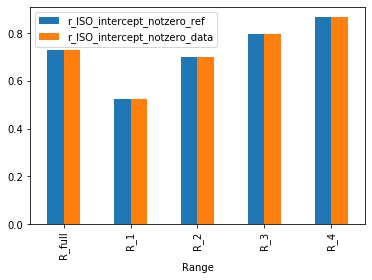

In [7]:
# bar plot a comparison between the ranges of analysis
#dataframe_full[['MatID'=='Material_1','r_function'==1,
#                'Range','r_ISO_intercept_notzero_ref','r_ISO_intercept_notzero_data']].plot.bar()
dataframe_full[(dataframe_full['MatID']=='Material_1') & 
               (dataframe_full['r_function']==6) & 
               (dataframe_full['Method']=='B')][['Range','r_ISO_intercept_notzero_ref',
                                                 'r_ISO_intercept_notzero_data']].plot.bar(x='Range')

In [8]:
# calculate the difference between the data values and the reference values
dataframe_full['diff_r_ISO_intercept_notzero']=(dataframe_full['r_ISO_intercept_notzero_data']-
                                                dataframe_full['r_ISO_intercept_notzero_ref'])
dataframe_full['diff_r_ISO_intercept_zero']=(dataframe_full['r_ISO_intercept_zero_data']-
                                                dataframe_full['r_ISO_intercept_zero_ref'])
dataframe_full['diff_r_single_point']=(dataframe_full['r_single_point_data']-
                                                dataframe_full['r_single_point_ref'])
dataframe_full['diff_r_single_point2']=(dataframe_full['r_single_point_data']-
                                                dataframe_full['r_applied_point_ref'])

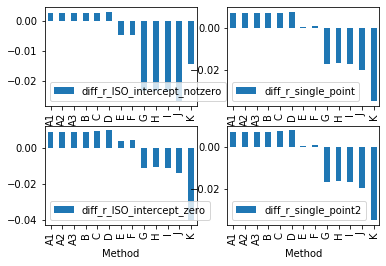

In [9]:
# select based on material, r_function, and formulation Method
plot_conditional=((dataframe_full['MatID']=='Material_1') & 
                  (dataframe_full['r_function']==1) & 
                  (dataframe_full['Method']=='B'))
# select based on material, r_function, and range of analysis
plot_conditional=((dataframe_full['MatID']=='Material_6') & 
                  (dataframe_full['r_function']==6) & 
                  (dataframe_full['Range']=='R_full'))

# seperate bar plot for each difference metric
fig, axes = plt.subplots(nrows=2, ncols=2)
dataframe_full[plot_conditional].plot.bar(x='Method', y='diff_r_ISO_intercept_notzero', ax=axes[0,0])
dataframe_full[plot_conditional].plot.bar(x='Method', y='diff_r_ISO_intercept_zero', ax=axes[1,0])
dataframe_full[plot_conditional].plot.bar(x='Method', y='diff_r_single_point', ax=axes[0,1])
dataframe_full[plot_conditional].plot.bar(x='Method', y='diff_r_single_point2', ax=axes[1,1])

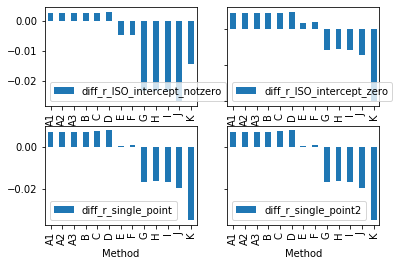

In [10]:
# alternative method of creating sub plots
plt.figure(3)
plt.subplot(2,2,1)
sub1=dataframe_full[plot_conditional].plot.bar(x='Method', y='diff_r_ISO_intercept_notzero', ax=plt.gca())
plt.subplot(2,2,2)
dataframe_full[plot_conditional].plot.bar(x='Method', y='diff_r_ISO_intercept_zero', ax=plt.gca(), sharey=sub1)
plt.subplot(2,2,3)
dataframe_full[plot_conditional].plot.bar(x='Method', y='diff_r_single_point', ax=plt.gca(), sharey=sub1)
plt.subplot(2,2,4)
dataframe_full[plot_conditional].plot.bar(x='Method', y='diff_r_single_point2', ax=plt.gca(), sharey=sub1)



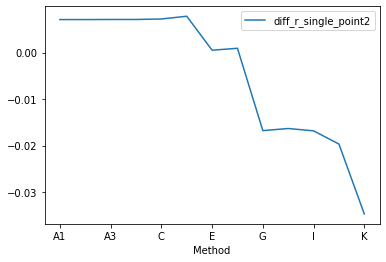

In [11]:
# sample line plot (probably not as good as bar plot)
dataframe_full[plot_conditional].plot.line(x='Method', y='diff_r_single_point2')

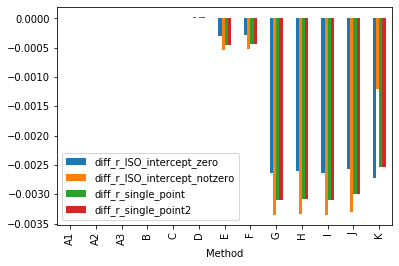

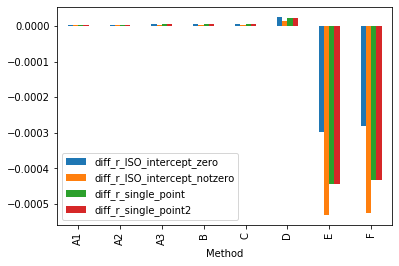

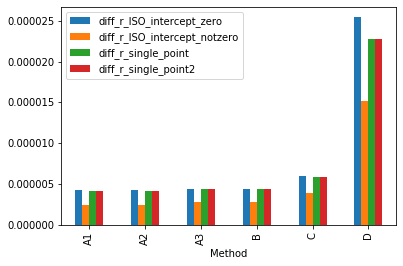

In [12]:
# bar plot comparison between methods at one range
plot_conditional=((dataframe_full['MatID']=='Material_1') & 
                  (dataframe_full['r_function']==6) & 
                  (dataframe_full['Range']=='R_full'))
#    all methods
dataframe_full[plot_conditional][['Method','diff_r_ISO_intercept_zero',
                                  'diff_r_ISO_intercept_notzero',
                                  'diff_r_single_point',
                                  'diff_r_single_point2']].plot.bar(x='Method', ax=None)

#    close-up of methods A1-F
plot_conditional=((dataframe_full['MatID']=='Material_1') & 
                  (dataframe_full['r_function']==6) & 
                  (dataframe_full['Range']=='R_full') & 
                  (dataframe_full['Method'].str.match('[A-F]')))

dataframe_full[plot_conditional][['Method','diff_r_ISO_intercept_zero',
                                  'diff_r_ISO_intercept_notzero',
                                  'diff_r_single_point',
                                  'diff_r_single_point2']].plot.bar(x='Method', ax=None)

#    close-up of methods A1-D
plot_conditional=((dataframe_full['MatID']=='Material_1') & 
                  (dataframe_full['r_function']==6) & 
                  (dataframe_full['Range']=='R_full') & 
                  (dataframe_full['Method'].str.match('[A-D]')))

dataframe_full[plot_conditional][['Method','diff_r_ISO_intercept_zero',
                                  'diff_r_ISO_intercept_notzero',
                                  'diff_r_single_point',
                                  'diff_r_single_point2']].plot.bar(x='Method', ax=None)

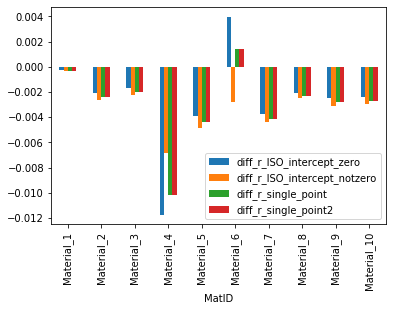

In [13]:
# plot for one method the results for different materials and the full range
plot_conditional=((dataframe_full['r_function']==2) & 
                  (dataframe_full['Range']=='R_full') & 
                  (dataframe_full['Method'].str.match('[E]')))

dataframe_full[plot_conditional][['MatID','diff_r_ISO_intercept_zero',
                                  'diff_r_ISO_intercept_notzero',
                                  'diff_r_single_point',
                                  'diff_r_single_point2']].plot.bar(x='MatID', ax=None)

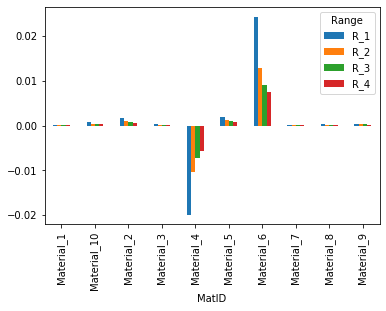

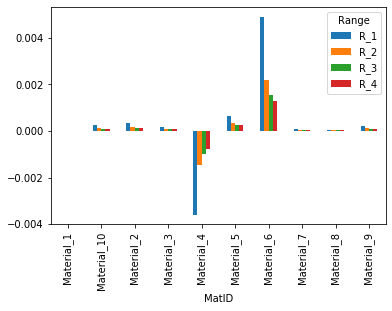

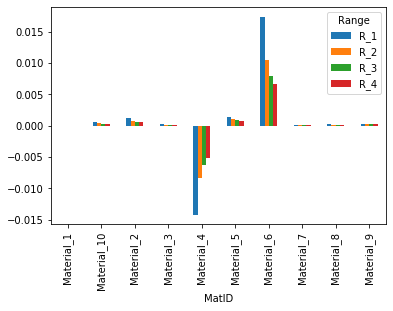

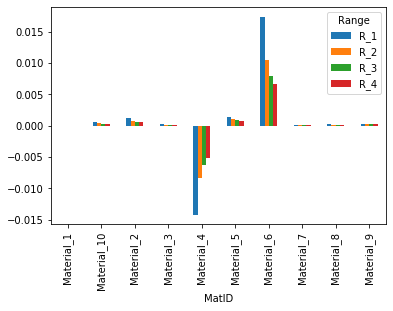

In [14]:
# plot for one method the results for different materials and the four quarter ranges
#  attempting to use .pivot()
plot_conditional=((dataframe_full['r_function']==2) & 
                  (dataframe_full['Range'].str.match('R_[1-4]')) &
                  (dataframe_full['Method'].str.match('[D]')))

dataframe_full[plot_conditional].pivot(index='MatID',
                                       columns='Range',
                                       values='diff_r_ISO_intercept_zero').plot.bar()

dataframe_full[plot_conditional].pivot(index='MatID',
                                       columns='Range',
                                       values='diff_r_ISO_intercept_notzero').plot.bar()

dataframe_full[plot_conditional].pivot(index='MatID',
                                       columns='Range',
                                       values='diff_r_single_point').plot.bar()

dataframe_full[plot_conditional].pivot(index='MatID',
                                       columns='Range',
                                       values='diff_r_single_point2').plot.bar()
#
# Use of pivot table to reorganize the plot
# df.pivot(index=x_axis_items, columns=different_color_bars, values=variable_to be plotted)
#

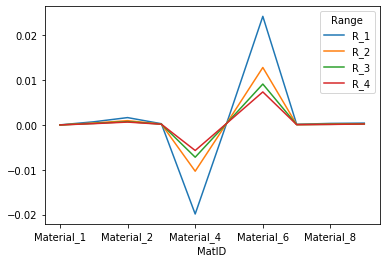

In [15]:
# what would these look like as a line plot using .pivot()
dataframe_full[plot_conditional].pivot(index='MatID',
                                       columns='Range',
                                       values='diff_r_ISO_intercept_zero').plot.line()

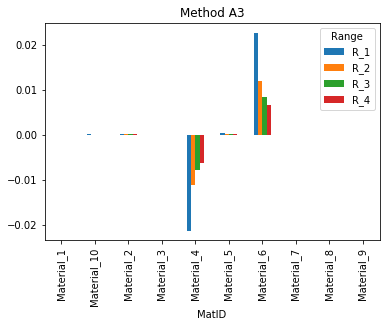

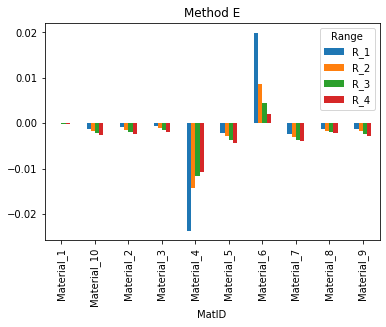

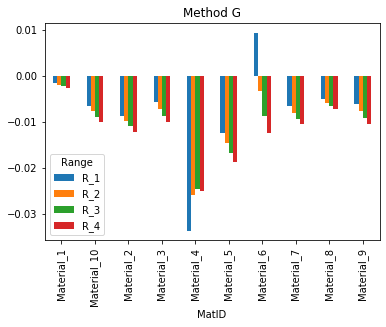

In [16]:
# select a few formulation methods and compare them for all 10 materials
methods = ['A3', 'E', 'G']
for x in methods:
    plot_conditional=((dataframe_full['r_function']==2) & 
                  (dataframe_full['Range'].str.match('R_[1-4]')) &
                  (dataframe_full['Method'].str.match(x)))

    dataframe_full[plot_conditional].pivot(index='MatID',
                                       columns='Range',
                                       values='diff_r_ISO_intercept_zero').plot.bar(title=('Method '+x))


## Check sensitivity to material use a common axis and include materials 4,5,6 for all methods

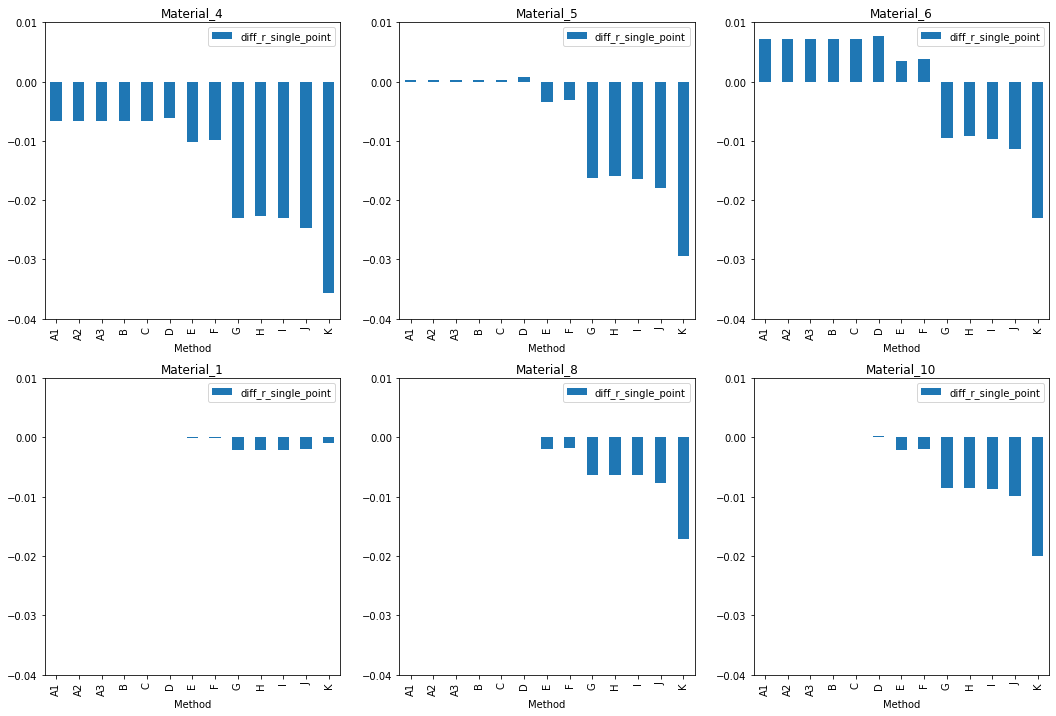

In [17]:
#  select one error score
#plot_variable='diff_r_ISO_intercept_zero'
#plot_variable='diff_r_ISO_intercept_notzero'
plot_variable='diff_r_single_point'
#plot_variable='diff_r_single_point2'

plt.rcParams["figure.figsize"]=18,12
plt.figure(1)
n=1
for x in [4,5,6,1,8,10]:
    plot_conditional=((dataframe_full['MatID']==('Material_'+ str(x))) & 
                      (dataframe_full['r_function']==1) & 
                      (dataframe_full['Range']=='R_3'))
    plt.subplot(2,3,n)
    if n==1:
        dataframe_full[plot_conditional].plot.bar(x='Method', y=plot_variable,ylim=[-0.04,0.01], 
                                                  ax=plt.gca(), title=('Material_'+ str(x)))
    else:
        dataframe_full[plot_conditional].plot.bar(x='Method', y=plot_variable,ylim=[-0.04,0.01], 
                                                  ax=plt.gca(), title=('Material_'+ str(x)))
    n=n+1

plt.rcParams["figure.figsize"]=6,3 # return to default
            

## Correlation plots for most of the variables for a specific variable r_function and formula method

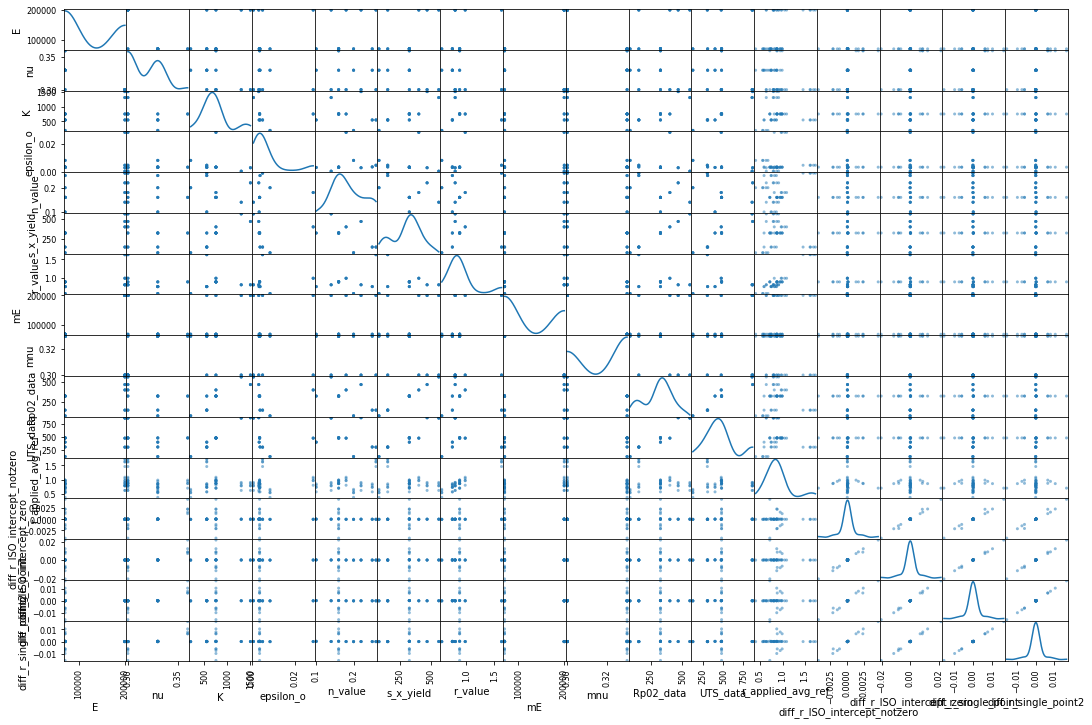

In [18]:
dataframe_diff=dataframe_full[(dataframe_full['r_function']==4)&(dataframe_full['Method']=='A2')
                             ].drop(columns=['MatID','r_function','r_ISO_intercept_zero_ref',
                                             'r_ISO_intercept_zero_data', 'r_ISO_intercept_notzero_ref',
                                             'r_ISO_intercept_notzero_data', 'r_applied_point_ref',
                                             'r_single_point_ref', 'r_single_point_data', 'n_value_data',
                                             'Range','Method','to','wo','lo'])
                                             
plt.rcParams["figure.figsize"]=18,12
pd.plotting.scatter_matrix(dataframe_diff, diagonal='kde')
plt.rcParams["figure.figsize"]=6,3
#dataframe_diff

## correlation comparison including all the methods for one variable r_function

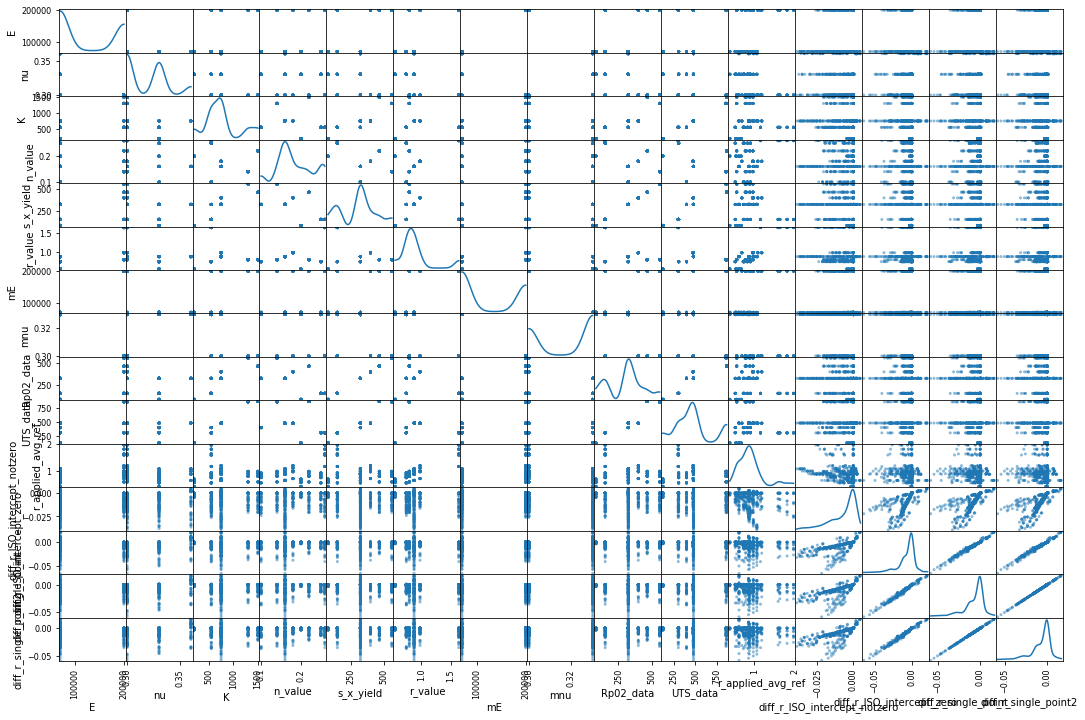

In [19]:
dataframe_diff=dataframe_full[(dataframe_full['r_function']==6)
                             ].drop(columns=['MatID','r_function','r_ISO_intercept_zero_ref',
                                             'r_ISO_intercept_zero_data', 'r_ISO_intercept_notzero_ref',
                                             'r_ISO_intercept_notzero_data', 'r_applied_point_ref',
                                             'r_single_point_ref', 'r_single_point_data', 'n_value_data',
                                             'Range','epsilon_o','to','wo','lo'])
                                             
plt.rcParams["figure.figsize"]=18,12
pd.plotting.scatter_matrix(dataframe_diff, diagonal='kde')
plt.rcParams["figure.figsize"]=6,3

## compare the correlation plots for the three error metrics for all 6 variable r_function

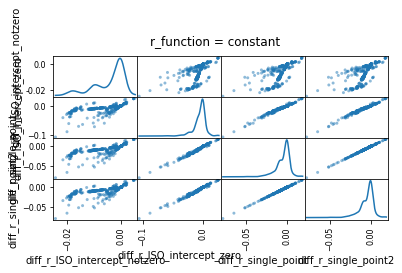

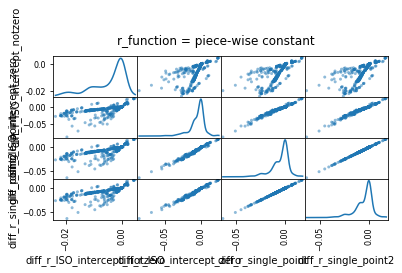

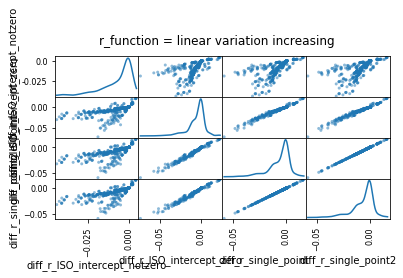

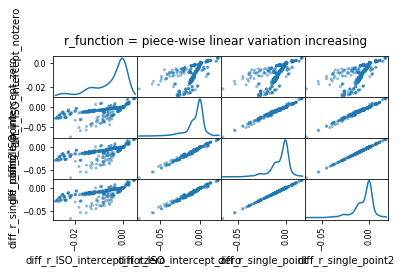

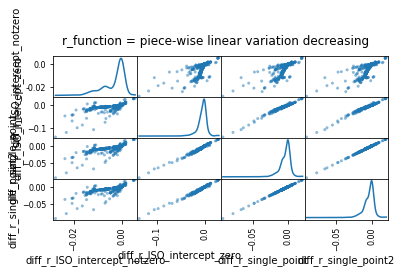

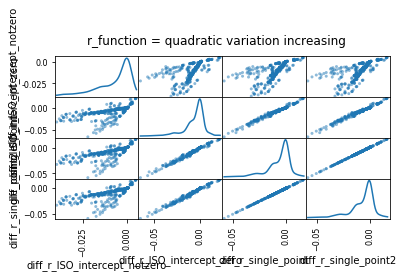

In [20]:
function_descriptions=['constant','piece-wise constant',
                       'linear variation increasing',
                       'piece-wise linear variation increasing',
                       'piece-wise linear variation decreasing',
                       'quadratic variation increasing']
plt.rcParams["figure.figsize"]=6,3
for n in range(1,7):
    dataframe_diff=dataframe_full[(dataframe_full['r_function']==n)][['diff_r_ISO_intercept_notzero',
                                                                      'diff_r_ISO_intercept_zero',
                                                                      'diff_r_single_point',
                                                                      'diff_r_single_point2']]
    axs=pd.plotting.scatter_matrix(dataframe_diff, diagonal='kde')
    plt.suptitle('r_function = '+ function_descriptions[n-1])
    plt.show()
    # rotate labels
    x_rotation = 0
    y_rotation = 0

plt.rcParams["figure.figsize"]=6,3

## Compare the correlation plots of the three error metrics for five of the formulation methods

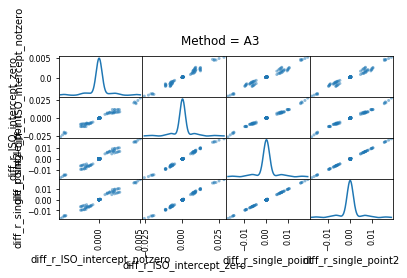

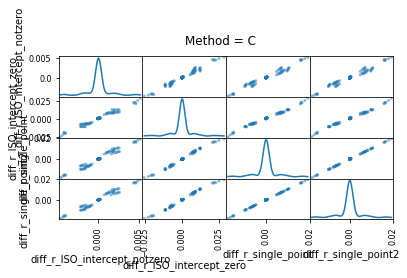

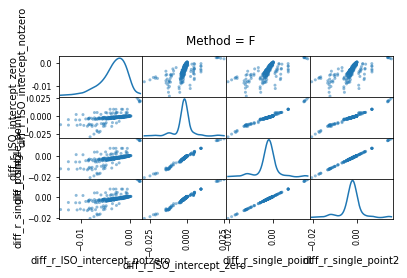

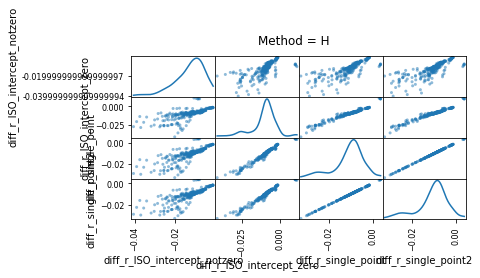

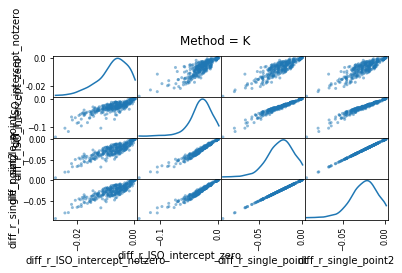

In [21]:
plt.rcParams["figure.figsize"]=6,3
for n in ['A3','C','F','H','K']:
    dataframe_diff=dataframe_full[(dataframe_full['Method']==n)][['diff_r_ISO_intercept_notzero',
                                                                      'diff_r_ISO_intercept_zero',
                                                                      'diff_r_single_point',
                                                                      'diff_r_single_point2']]
    pd.plotting.scatter_matrix(dataframe_diff, diagonal='kde')
    plt.suptitle('Method = '+ n)
    plt.show()
plt.rcParams["figure.figsize"]=6,3